In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Age'] = SimpleImputer(strategy='mean').fit_transform(df[['Age']])
trainX, testX, trainY, testY = train_test_split(df[['Pclass','Age', 'Parch']], df['Survived'],
                                                test_size=0.3, random_state=1080)

In [24]:
pipe = Pipeline([
  # ('poly', PolynomialFeatures(degree=3, include_bias=False)),
  ('scale',StandardScaler()),
  ('linear', LinearRegression())
])

In [25]:
scores = cross_val_score(pipe, trainX, trainY, cv=5, scoring='neg_mean_squared_error')

In [33]:
X = df[['Age','Pclass','Parch']]
y = df['Survived']

In [37]:
ks = [2,5,10,20,df.shape[0]]
MSEs = []

for k in ks:
  scores = cross_val_score(pipe, X, y, cv=k, scoring='neg_mean_squared_error') * -1
  MSEs.append(scores.mean())

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='k'>

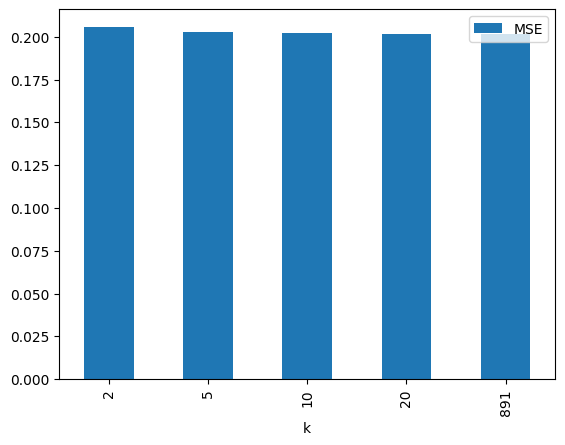

In [41]:
pd.DataFrame({'k': ks, 'MSE':MSEs}).plot(kind='bar', x='k', y='MSE')

In [36]:
k

891